# Impact of Covid-19 Pandemic on the Global Economy: Emphasis on Poverty Alleviation and Economic Growth

## Introduction: Business Understanding

Most are aware that Covid-19 has had some sort of impact on the Global Economy. Generally, some believe it has negatively impacted the economy, while others have used it as an opportunity to stimulate economic growth. These classifications may have created a dynamic that is difficult to determine. Leaving most susceptible to misinformation.  Our study aims to discover,
* Whether or not the Covid-19 pandemic has had a negative or positive impact across various countries. Then determine the measure of the impact, to decide which countries are affected the most
* ??
* ??

Uncovering these insights will enable us to conclude on poverty alleviation and economic growth.

National and international leaders need to acquire this account because it gives them an understanding of the pandemic has dynamically altered the Global Economy. We look towards identifying trends and behaviors under uncertainty to give us an account of how we should proceed with poverty alleviation and economic growth. After doing so, it is the objective of this study to make sense of the data and purposely create a model that will provide a framework to make decisions about the Global Economy. Our approach to fostering a bounce-back (if there is negative impact). 


### Key terms:

[Global (World) Economy](https://dictionary.cambridge.org/dictionary/english/global-economy) - The system of industry and trade around the world that has developed as the result of globalization (= the way in which economies have been developing to operate together as one system). It has also become more important and more complex. When one country does well, other countries see a boost in their economies. Some of these industries include, flight, internet, fossil-fuel, banking, etc. 

[Poverty Reduction](https://en.wikipedia.org/wiki/Poverty_reduction#:~:text=Poverty%20reduction%2C%20poverty%20relief%2C%20or,lift%20people%20out%20of%20poverty.&text=The%20dawn%20of%20the%20Industrial,now%20considered%20the%20developed%20world.) - is a set of measures, both economic and humanitarian, that are intended to permanently lift people out of poverty. Poverty alleviation involves improving the living conditions of people who are already poor.

[Economic Growth](https://www.thebalance.com/what-is-economic-growth-3306014#:~:text=Economic%20growth%20is%20an%20increase,invest%20and%20hire%20more%20employees.) - Economic growth is an increase in the production of goods and services over a specific period. To be most accurate, the measurement must remove the effects of inflation. Economic growth creates more profit for businesses. As a result, stock prices rise. That gives companies capital to invest and hire more employees 

Note:
* Globalization has led to high economic growth. Therefore, determining whether covid 19 has slowed globalization is relevant to our analysis 

## Data

There are 10 variables in the _transformed_data.csv_ dataset. The target variable is defined as the ?. 

Here is a brief description of the features available. 

* **ISO Country Code (CODE):** Internationally recognized codes that designate every country and most of the dependent areas a two-letter or three-letter combination. Think of it as an acronym for a country. 
* **Country:** Country names 
* **Date:** Daily values (range ?)
* **Human Development Index (HDI):**
  * A geometric mean (equally-weighted) of life expectancy, education, and GNI per capita OR a statistic composite index of life expectancy, education, and per capita income indicators. A summary of average achievment in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. (Summarize later)
  * Further, it ranks countries in the following categories
    * Very high: 0.800 - 1.000
    * High: 0.700 - 0.799
    * Medium: 0.550 - 0.699
    * Low: 0.350 - 0.590 
* **Total Cases (TC):** Total (culmulative) covid-19 cases 
* **Total Death (TD):** Total Deaths (due to covid ?)
* **Stringency Index (STI):** This is a composite measure based on nine response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest).
* **Public offering price (POP):** the price at which new issues of stock are offered to the public by an underwriter
* **Gross domestic product per capita, or GDP per capita (GDPCAP):** A measure of a country's economic output per person. It is is calculated by dividing the GDP by its population.

Note: 
* We are focused on the relationship between **covid-19** and the **Global** economy
* Determing the correleation between the two may provide us with some insight
* Exploring the impact over time


## Data Preparation

Overview
* Explore both data sets

In [5]:
# import relevant libraries 

# Data processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
# !pip install plotly.express
import plotly.express as px
import plotly.graph_objects as go
import pylab 


#statistical testing 
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats


#Modelling

print("Successfully imported libraries!")

Successfully imported libraries!


Lets take a look at the two datasets given.

In [6]:
# df_raw = pd.read_csv("data/raw_data.csv")
df_raw = pd.read_csv("raw_data.csv")

df_raw.head(n=5)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [134]:
# df_tr = pd.read_csv("data/transformed_data.csv")
df_tr = pd.read_csv("transformed_data.csv")

df_tr.head(n=5)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


At first glance they seem to be similar, and the transformed dataset cleaner. 

It seems the reason for this transformaion was due to the scale of values. It enables us to plot several features on same plot.

But lets clean the raw data, and discover the practical use and limitations ourselves

In [8]:
np.__version__ 
pd.__version__

'1.1.5'

In [9]:
# !conda update pandas

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 50418 non-null  object 
 1   location                 50418 non-null  object 
 2   date                     50418 non-null  object 
 3   total_cases              47324 non-null  float64
 4   total_deaths             39228 non-null  float64
 5   stringency_index         43292 non-null  float64
 6   population               50418 non-null  int64  
 7   gdp_per_capita           44706 non-null  float64
 8   human_development_index  44216 non-null  float64
 9   Unnamed: 9               50418 non-null  object 
 10  Unnamed: 10              50418 non-null  object 
 11  Unnamed: 11              50418 non-null  object 
 12  Unnamed: 12              50418 non-null  float64
 13  Unnamed: 13              50418 non-null  object 
dtypes: float64(6), int64(1

In [11]:
df_raw.describe()

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 12
count,4.732400e+04,39228.000000,43292.000000,5.041800e+04,44706.000000,44216.000000,50418.000000
mean,6.621927e+04,2978.767819,56.162022,4.251601e+07,20818.706240,0.720139,15.442097
std,4.045582e+05,13836.644013,27.532685,1.564607e+08,20441.365392,0.160902,2.495039
min,0.000000e+00,0.000000,0.000000,8.090000e+02,661.240000,0.000000,6.695799
25%,1.260000e+02,10.000000,37.960000,1.399491e+06,5338.454000,0.601000,14.151619
50%,1.594000e+03,64.000000,61.110000,8.278737e+06,13913.839000,0.752000,15.929201
75%,1.584775e+04,564.000000,78.700000,2.913681e+07,31400.840000,0.847000,17.187513
max,8.154595e+06,219674.000000,100.000000,1.439324e+09,116935.600000,0.953000,21.087439


In [12]:
df_raw.isnull().sum()

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
Unnamed: 9                     0
Unnamed: 10                    0
Unnamed: 11                    0
Unnamed: 12                    0
Unnamed: 13                    0
dtype: int64

In [13]:
df_raw.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'total_deaths',
       'stringency_index', 'population', 'gdp_per_capita',
       'human_development_index', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [14]:
# rename columns 
columns = ['iso_code', 'location', 'date', 'total_cases', 'total_deaths',
       'stringency_index', 'population', 'gdp_per_capita',
       'human_development_index', 'TC', 'TD', 'STI',
       'POP', 'GDPCAP']

In [15]:
df_raw.columns = columns
df_raw.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


"#NUM!" is an Excel error and are coming directly from the csv file. They occur when a formula or function contains numeric values that are not valid. Usually when the data type is not supported. Since all remaining values in the column are floats, we can use _pd.to_numeric()_ for each necessary column. Alternatively we can replace the all occurences of "#NUM!" 

Notice that the data type of TC, TD, STI, and GDPCAP are objects - strings and are supposed to be floats

In [16]:
sum(df_raw['GDPCAP'].str.count('#NUM!'))

5712

In [17]:
columns_to_numeric = ['TC', 'TD', 'STI','GDPCAP']
for col in columns_to_numeric:
    df_raw[col] = pd.to_numeric(df_raw[col], errors = 'coerce')

df_raw.dtypes

iso_code                    object
location                    object
date                        object
total_cases                float64
total_deaths               float64
stringency_index           float64
population                   int64
gdp_per_capita             float64
human_development_index    float64
TC                         float64
TD                         float64
STI                        float64
POP                        float64
GDPCAP                     float64
dtype: object

In [18]:
df_raw.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,NaN,NaN,NaN,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,NaN,NaN,NaN,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,NaN,NaN,NaN,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,NaN,NaN,NaN,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,NaN,NaN,NaN,17.477233,7.497754


In [19]:
df_raw.isnull().sum()

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
TC                          3594
TD                         12298
STI                        10042
POP                            0
GDPCAP                      5712
dtype: int64

Two things are happening here; null are now be accounted for and the number of null values for total_cases and TC differs. Similar for other similar columns


We can simply replace the Nan values with 0 across the whole dataframe, but that is not good practice. As we must take in to account the runtime and that not all columns are numeric. 

In [20]:
cols_= ['total_cases','total_deaths','stringency_index','gdp_per_capita','human_development_index']
cols_to_replace = columns_to_numeric +  cols_
cols_to_replace
for col in cols_to_replace:
    df_raw[col].replace(np.nan, float(0), inplace = True)
    
df_raw.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754


In [21]:
df_raw.describe()

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,TC,TD,STI,POP,GDPCAP
count,5.041800e+04,50418.000000,50418.000000,5.041800e+04,50418.000000,50418.000000,50418.000000,50418.000000,50418.000000,50418.000000,50418.000000
mean,6.215560e+04,2317.646555,48.224171,4.251601e+07,18460.095227,0.631553,6.762125,3.413681,3.178897,15.442097,8.318580
std,3.922702e+05,12267.528868,32.151346,1.564607e+08,20348.222700,0.280450,3.637347,3.082761,1.673451,2.495039,3.177130
min,0.000000e+00,0.000000,0.000000,8.090000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,6.695799,0.000000
25%,6.400000e+01,1.000000,17.590000,1.399491e+06,2851.153000,0.519000,4.158883,0.000000,2.867331,14.151619,7.955479
50%,1.203000e+03,24.000000,54.630000,8.278737e+06,11713.895000,0.723000,7.092574,3.178054,4.000583,15.929201,9.368531
75%,1.342225e+04,276.000000,76.390000,2.913681e+07,27936.896000,0.825000,9.504669,5.620401,4.335852,17.187513,10.237704
max,8.154595e+06,219674.000000,100.000000,1.439324e+09,116935.600000,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379


Comparing the 'word_word' columns vs the "AZ' columns, we have that total_cases and TC may have different units. Similarily for total_deaths and TD, stringency_index and STI. In contrast, gdp_per_capita and GDP remain equivalent and earlier it was noticed that these two columns had the same amount of missing values

??how do we interpret those difference in values. The 'word_word' columns seems to be in familair units - as described by there respective definitions. ??The 'AZ' columns, I have no clue...

In [22]:
df_raw.isnull().sum()

iso_code                   0
location                   0
date                       0
total_cases                0
total_deaths               0
stringency_index           0
population                 0
gdp_per_capita             0
human_development_index    0
TC                         0
TD                         0
STI                        0
POP                        0
GDPCAP                     0
dtype: int64

In [23]:
df_tr.describe()

,HDI,TC,TD,STI,POP,GDPCAP
count,44216.000000,50418.000000,50418.000000,50418.000000,50418.000000,50418.000000
mean,0.720139,6.762125,3.413681,3.178897,15.442097,8.318580
std,0.160902,3.637347,3.082761,1.673451,2.495039,3.177130
min,0.000000,0.000000,0.000000,0.000000,6.695799,0.000000
25%,0.601000,4.158883,0.000000,2.867331,14.151619,7.955479
50%,0.752000,7.092574,3.178054,4.000583,15.929201,9.368531
75%,0.847000,9.504669,5.620401,4.335852,17.187513,10.237704
max,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379


In [24]:
df_tr.isnull().sum()

CODE          0
COUNTRY       0
DATE          0
HDI        6202
TC            0
TD            0
STI           0
POP           0
GDPCAP        0
dtype: int64

Although there is 6202 missing values for HDI, we will **not** fill in these values we an **average meausure**. Since doing so would add more noise to the data. More specifically, the averages will comprise of numbers based on countries with different populations. Therefore, we will simply **replace** the 6202 missing HDI values with **zero**

In [135]:
df_tr['HDI'] = df_tr['HDI'].fillna(0)
# df['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0)


In [26]:
df_tr.isnull().sum()

CODE       0
COUNTRY    0
DATE       0
HDI        0
TC         0
TD         0
STI        0
POP        0
GDPCAP     0
dtype: int64

In [27]:
df_tr.dtypes

CODE        object
COUNTRY     object
DATE        object
HDI        float64
TC         float64
TD         float64
STI        float64
POP        float64
GDPCAP     float64
dtype: object

In [74]:
df_tr["DATE"] = pd.to_datetime(df_tr["DATE"], format = '%Y-%m-%d') #convert column to datetime
df_tr.dtypes

CODE               object
COUNTRY            object
DATE       datetime64[ns]
HDI               float64
TC                float64
TD                float64
STI               float64
POP               float64
GDPCAP            float64
dtype: object

In [29]:
df_tr.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [30]:
df_tr[df_tr['COUNTRY']=='Afghanistan'].describe()


,HDI,TC,TD,STI,POP,GDPCAP
count,2.940000e+02,294.000000,294.000000,294.000000,2.940000e+02,2.940000e+02
mean,4.980000e-01,6.804919,4.173293,3.049673,1.747723e+01,7.497754e+00
std,3.892406e-16,4.376160,3.079385,1.757542,3.202894e-14,8.896928e-15
min,4.980000e-01,0.000000,0.000000,0.000000,1.747723e+01,7.497754e+00
25%,4.980000e-01,1.526198,0.000000,2.119863,1.747723e+01,7.497754e+00
50%,4.980000e-01,9.294083,5.386783,3.902387,1.747723e+01,7.497754e+00
75%,4.980000e-01,10.516691,7.168580,4.365643,1.747723e+01,7.497754e+00
max,4.980000e-01,10.601622,7.307873,4.433907,1.747723e+01,7.497754e+00


Lets see if we can work backwards

In [31]:
print(min(df_raw['gdp_per_capita']))
print(max(df_raw['gdp_per_capita']))

0.0
116935.6


In [32]:
print(min(df_tr['GDPCAP']))
print(max(df_tr['GDPCAP']))

0.0
11.66937863


In [33]:
df_tr[df_tr['COUNTRY']=='Afghanistan'].head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [34]:
df_raw.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'total_deaths',
       'stringency_index', 'population', 'gdp_per_capita',
       'human_development_index', 'TC', 'TD', 'STI', 'POP', 'GDPCAP'],
      dtype='object')

In [35]:
df_raw.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754


In [36]:
to_standardize = ['stringency_index', 'gdp_per_capita','human_development_index','total_cases', 'total_deaths']

df_raw[to_standardize].head()

,stringency_index,gdp_per_capita,human_development_index,total_cases,total_deaths
0,0.0,1803.987,0.498,0.0,0.0
1,0.0,1803.987,0.498,0.0,0.0
2,0.0,1803.987,0.498,0.0,0.0
3,0.0,1803.987,0.498,0.0,0.0
4,0.0,1803.987,0.498,0.0,0.0


By this it looks like a method of normalization was used

In [37]:
mm_sc = MinMaxScaler()
s_sc = StandardScaler()

scaled_mm = mm_sc.fit_transform(df_raw[['gdp_per_capita']])
# max(scaled_mm)
print(max(scaled_mm))


scaled_sc = s_sc.fit_transform(df_raw[['gdp_per_capita']])
# max(scaled_mm)
print(max(scaled_sc))

[1.]
[4.83956181]


Unable to find the scaler used. But we know the reason for the transformation - some measures have data points that are far apart. This will complicate things when graphing several measure on the same graph or may speed up the calculations if training a model. The difficulty here is that, since we dont know the scalar used, results wont be easily interpreted. Thus, the transformed data is best for the evaluation of trends overtime. 

TODO: 
* Feature engineer - find continent dataset and merge 
* Feature engineer - find unemployment rate dataset and merge



## Exploratory Data Analysis

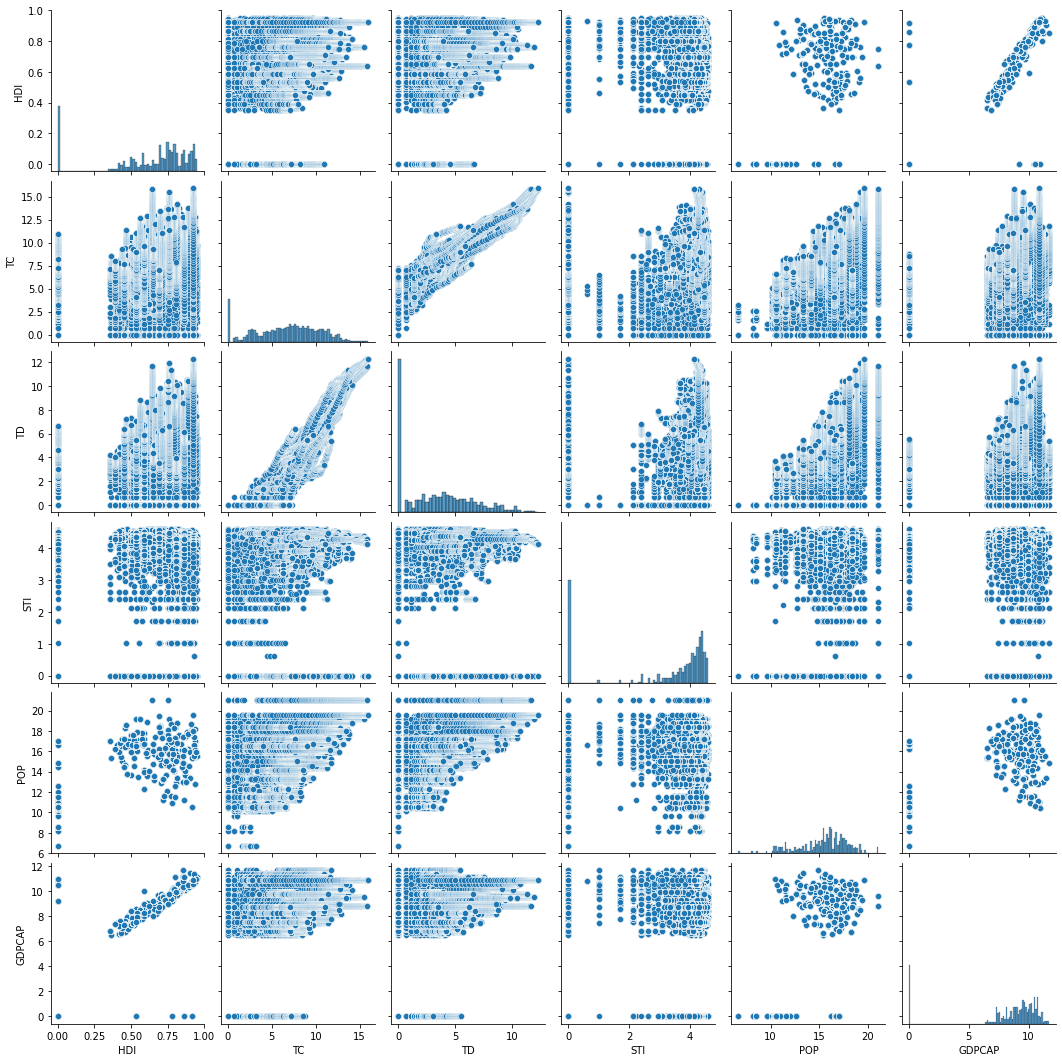

In [38]:
sns.pairplot(df_tr)

At this moment, we are more concerned with numeric features, so we select the necessary data.

There is noise, when evaluating the distribution of the variables. They disgregard time. 

In [39]:
df_tr.columns

Index(['CODE', 'COUNTRY', 'DATE', 'HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP'], dtype='object')

In [40]:
numeric_vars = ['HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP']

In [41]:
# correlation = df_tr[numeric_vars].corr()

# fig = go.Figure(data= go.Heatmap(x = correlation.index.values.tolist(), 
#                              y = correlation.index.values.tolist(),
#                              z = correlation.values
#                             ),
#                )
# fig.update_layout(title_text="Correlation of Numeric Variables",
#                   title_font_size=30)
# fig.show()

Text(0.5, 1.0, 'Correlation of Numerical Measures')

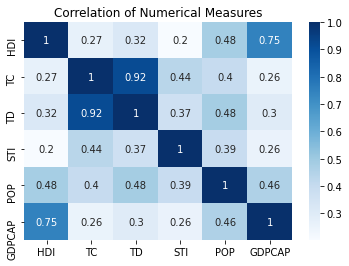

In [42]:
relevant_vars = ['HDI','POP', 'GDPCAP']
ax = sns.heatmap(df_tr[numeric_vars].corr(), annot=True, cmap = 'Blues')
ax.set_title("Correlation of Numerical Measures")

GDPCAP is the prominent variable in this study. GDPCAP and HDI have a moderately high correlation. The remaining have low correlations with GDPCAP. 

We can categorize TD, TC, STI as covid19 features and HDI, POP, and GDPCAP as economic features. 

Between the two groups, there is low correlation. This suggests that the features should be explored independently in regards to time. 

?? show prove independence of features 

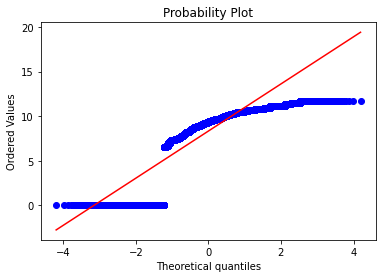

In [75]:
# import statsmodels.api as sm
# stats.qqplot(df_tr['GDPCAP'],lines = 's')

stats.probplot(df_tr['GDPCAP'], dist = 'norm', plot = pylab)
pylab.show()
#todo: subplot for all columns..

In [44]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
# normality test
stat, p = normaltest(df_tr['GDPCAP'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=16862.862, p=0.000
Sample does not look Gaussian (reject H0)


In [45]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(df_tr['GDPCAP'], df_tr['HDI'])
print('stat={0:.3g}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print(p)
    print('Probably independent')
else:
    print('Probably dependent')
print(p)

stat=0.81, p=0.810
Probably dependent
0.0


Text(0, 0.5, 'TD')

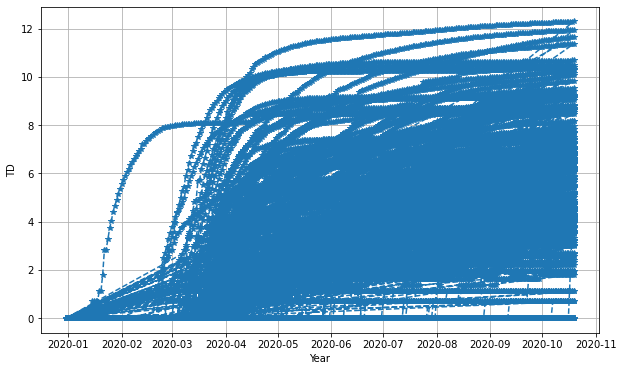

In [46]:
df_ = df_tr.copy()
df_.set_index('DATE', inplace = True)
plt.figure(figsize=(10,6))
plt.plot(df_.index, df_.TD, '--', marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('TD')

In [118]:
df_raw.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754


In [119]:
df_raw[df_raw['location']=='Afghanistan'].head()


,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754


In [127]:
# df_tr[df_tr['COUNTRY']=='Afghanistan'].describe()
countries = df_raw['location'].unique()

for c in countries:
  df_c = df_raw[df_raw['location']==c]
  df_c.set_index('date', inplace = True)
  # print(df_c.head())
  result = adfuller(df_c['TD'])
  # print(result)
  if result[1] > 0.05:
    print('Probably not Stationary:', c)


Probably not Stationary: Afghanistan
Probably not Stationary: Albania
Probably not Stationary: Algeria
Probably not Stationary: Angola
Probably not Stationary: Argentina
Probably not Stationary: Armenia


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning:

invalid value encountered in true_divide



Probably not Stationary: Aruba
Probably not Stationary: Australia
Probably not Stationary: Austria
Probably not Stationary: Azerbaijan
Probably not Stationary: Bahamas
Probably not Stationary: Bahrain
Probably not Stationary: Belarus
Probably not Stationary: Belgium
Probably not Stationary: Belize
Probably not Stationary: Benin
Probably not Stationary: Bonaire Sint Eustatius and Saba
Probably not Stationary: Botswana
Probably not Stationary: Brazil
Probably not Stationary: Brunei
Probably not Stationary: Canada
Probably not Stationary: Cape Verde
Probably not Stationary: Central African Republic
Probably not Stationary: Chad
Probably not Stationary: Comoros
Probably not Stationary: Costa Rica
Probably not Stationary: Croatia
Probably not Stationary: Czech Republic
Probably not Stationary: Democratic Republic of Congo
Probably not Stationary: Denmark
Probably not Stationary: Djibouti
Probably not Stationary: Dominican Republic
Probably not Stationary: Ecuador
Probably not Stationary: Eg

In [115]:
df_af = df_tr.copy()
df_af.set_index('DATE', inplace = True)
df_af.head()
df_af[['TD']]

,TD
DATE,
2019-12-31,0.000000
2020-01-01,0.000000
2020-01-02,0.000000
2020-01-03,0.000000
2020-01-04,0.000000
...,...
2020-10-15,5.442418
2020-10-16,5.442418
2020-10-17,5.442418


In [117]:
result = adfuller(df_af['TD'].values)
# stat, p, lags, obs, crit, t = adfuller(df_tr['TD'])

print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
if result[1] > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=-16.734, p=-16.734
ADF Statistic: -16.734397
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Probably Stationary


Explore data in regards to time

In [48]:

# df_ts = df_tr.copy()
# df_ts["DATE"] = pd.to_datetime(df_ts["DATE"]) #convert column to datetime
# df_ts.set_index("DATE", inplace=True)
# plt.figure(figsize=(10,6))
# plt.plot(df_ts.index, df_ts.GDPCAP, '--', marker='*', )
# plt.grid()
# plt.xlabel('Year')
# plt.ylabel('GDPCAP')

Text(0.5, 1.0, 'Total Cases (Daily) for all Countries')

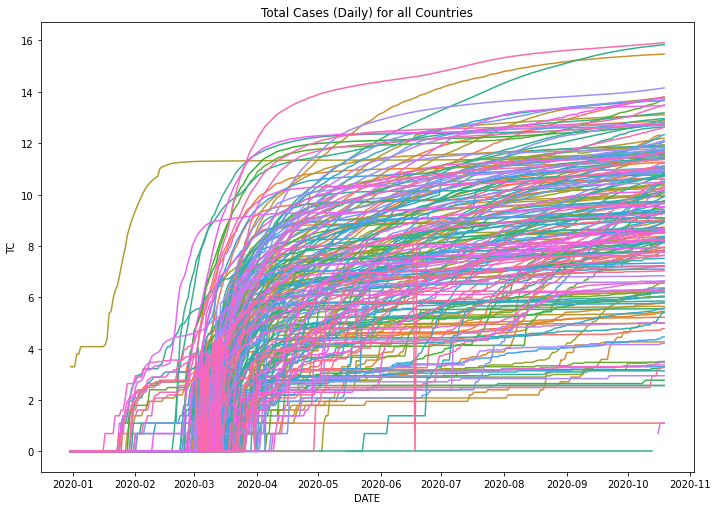

In [49]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(x=df_tr['DATE'], y=df_tr['TC'], hue = df_tr['COUNTRY'], legend = False)
ax.set_title("Total Cases (Daily) for all Countries")

Text(0.5, 1.0, 'Total Deaths (Daily) for all Countries')

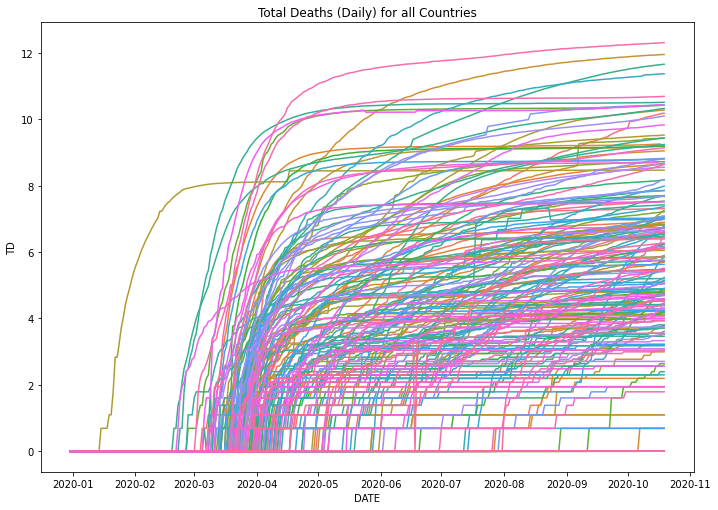

In [50]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=df_tr['DATE'], y=df_tr['TD'], hue = df_tr['COUNTRY'], legend = False)
ax.set_title("Total Deaths (Daily) for all Countries")

Overtime there is relatively an increase of of total cases and total deaths 

Text(0.5, 1.0, 'STI (Daily) for all all Countries')

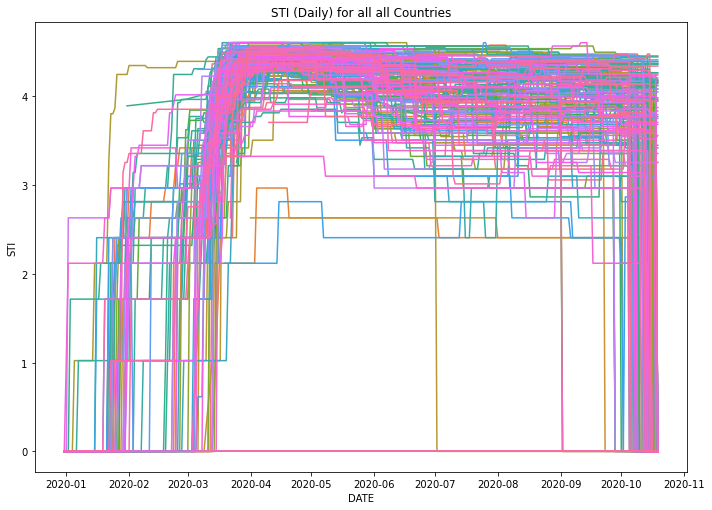

In [51]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=df_tr['DATE'], y=df_tr['STI'], hue = df_tr['COUNTRY'], legend = False)
ax.set_title("STI (Daily) for all all Countries")

In [52]:
# fig = px.line(df, x='year', y='lifeExp', color='country')

# fig = px.line(x=df_tr['DATE'], y=df_tr['STI'], color = df_tr['COUNTRY'])
# fig.show()

In [53]:
# df_tr['STI'].max()

In [54]:
# a4_dims = (11.7, 8.27)

# fig, ax = plt.subplots(figsize=a4_dims)
# sns.lineplot(x=df_tr['DATE'], y=df_tr['GDPCAP'], hue = df_tr['COUNTRY'], legend = False)
# ax.set_title("GDPCAP (Daily) for all all Countries")

In [55]:
# fig = px.line(df_tr, x = 'DATE', y='GDPCAP', color = 'COUNTRY',
#              title="GDPCAP (2020) for all Countries")
# fig.show()

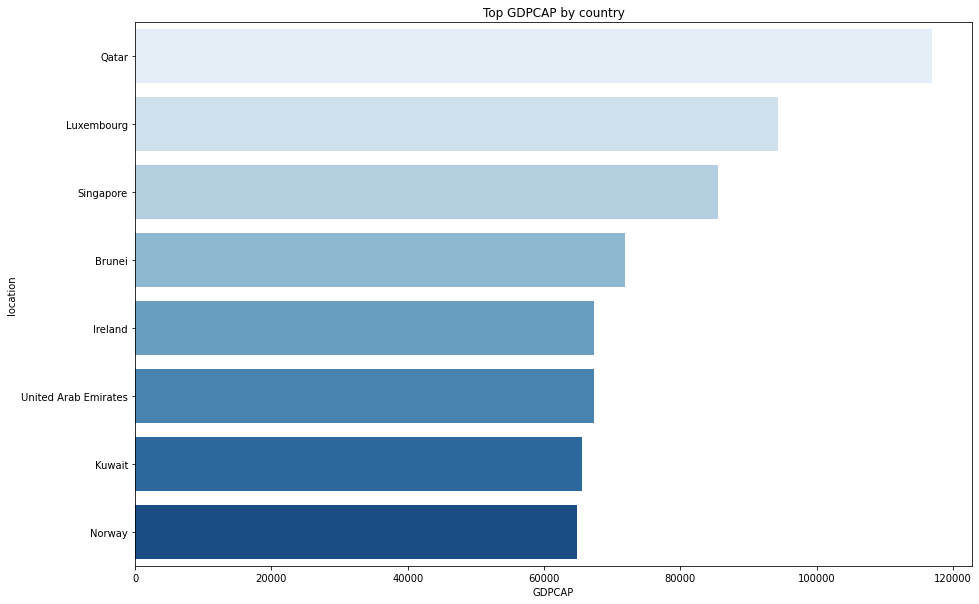

In [128]:
et = df_raw.sort_values(by='GDPCAP', ascending=False)[:2000]
figure = plt.figure(figsize=(15,10))
sns.barplot(y=et.location, x=et.gdp_per_capita, palette='Blues')
plt.xticks()
plt.xlabel('GDPCAP')
plt.ylabel('location')
plt.title('Top GDPCAP by country')
plt.show()

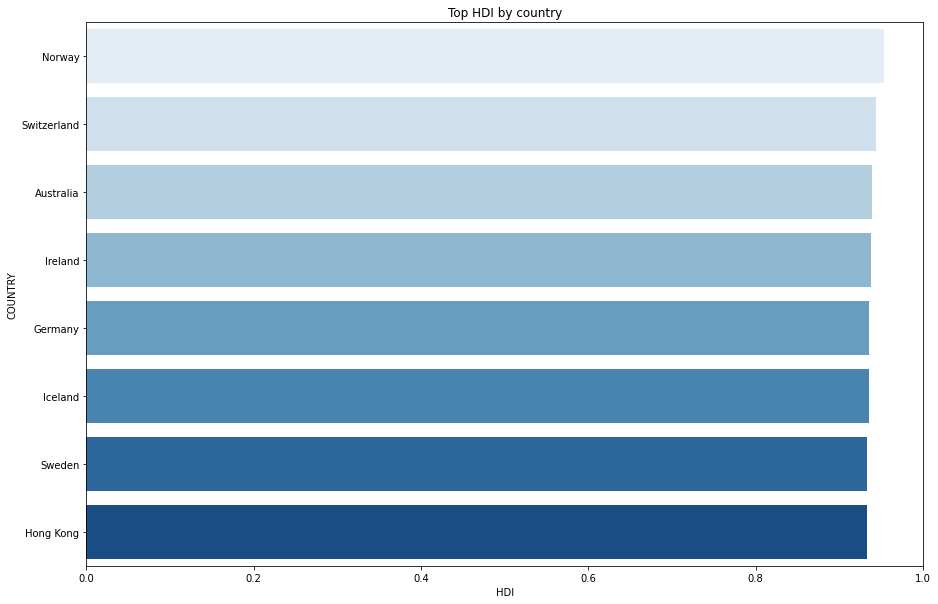

In [57]:
et = df_tr.sort_values(by='HDI', ascending=False)[:2000]
figure = plt.figure(figsize=(15,10))
sns.barplot(y=et.COUNTRY, x=et.HDI, palette='Blues')
plt.xticks()
plt.xlabel('HDI')
plt.ylabel('COUNTRY')
plt.title('Top HDI by country')
plt.show()

In [58]:
# a4_dims = (11.7, 8.27)

# fig, ax = plt.subplots(figsize=a4_dims)
# sns.lineplot(x=df_tr['DATE'], y=df_tr['HDI'], hue = df_tr['COUNTRY'], legend = False)


In [59]:
# sns.lineplot(x=df_tr['DATE'], y=df_tr['POP'], hue = df_tr['COUNTRY'], legend = False)

Interesting, so we're getting that the GDPCAP, POP and HDI were constant through 2020. This suggests that yearly values were collected and merged with daily data. Therefore, we may need to obtain data from previous years

If we were to continue our analysis with constant economic values, we can evaluate the distributions of the data again.  

In [64]:
df_tr.head()
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   CODE     50418 non-null  object        
 1   COUNTRY  50418 non-null  object        
 2   DATE     50418 non-null  datetime64[ns]
 3   HDI      50418 non-null  float64       
 4   TC       50418 non-null  float64       
 5   TD       50418 non-null  float64       
 6   STI      50418 non-null  float64       
 7   POP      50418 non-null  float64       
 8   GDPCAP   50418 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 3.5+ MB


In [133]:
df_tr.GDPCAP.mean()

8.31858030008036

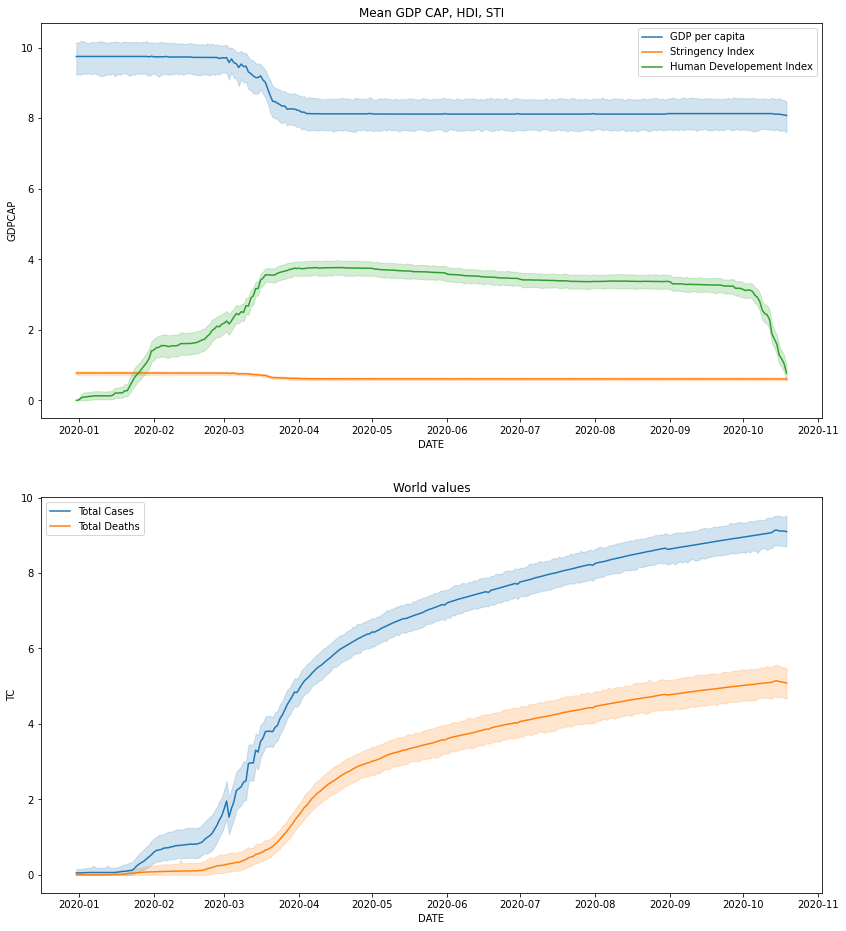

In [132]:
fig, ax =plt.subplots(2,1,figsize=(14,16))

sns.lineplot(ax=ax[0],x=df_tr.DATE,y=df_tr['GDPCAP'], label='GDP per capita')
sns.lineplot(ax=ax[0],x=df_tr.DATE,y=df_tr['HDI'], label='Stringency Index')
sns.lineplot(ax=ax[0],x=df_tr.DATE,y=df_tr['STI'], label='Human Developement Index')

ax[0].set_title('Mean GDP CAP, HDI, STI')

sns.lineplot(ax=ax[1],x=df_tr.DATE,y=df_tr['TC'], label='Total Cases')
sns.lineplot(ax=ax[1],x=df_tr.DATE,y=df_tr['TD'], label='Total Deaths')
plt.title('World values')
plt.show()

In [80]:
df_tr.set_index('DATE')
# df_tr["DATE"] = pd.to_datetime(df_tr["DATE"], format = '%Y-%m-%d')


,CODE,COUNTRY,HDI,TC,TD,STI,POP,GDPCAP
DATE,,,,,,,,
2019-12-31,AFG,Afghanistan,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
2020-01-01,AFG,Afghanistan,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
2020-01-02,AFG,Afghanistan,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
2020-01-03,AFG,Afghanistan,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
2020-01-04,AFG,Afghanistan,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
...,...,...,...,...,...,...,...,...
2020-10-15,ZWE,Zimbabwe,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
2020-10-16,ZWE,Zimbabwe,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
2020-10-17,ZWE,Zimbabwe,0.535,8.999496,5.442418,4.341855,16.514381,7.549491


In [136]:

# fig = px.scatter(case_month, x='GDP_Cap', y='Cases', hover_name='Country', animation_frame="Month", animation_group="Country", color='Continent', size='Population', template="simple_white", size_max=50)
fig = px.scatter(df_tr, x='GDPCAP', y='TC', hover_name='COUNTRY', animation_frame="DATE", animation_group="COUNTRY", template="simple_white", size_max=50)

fig.update_traces(textposition='top center')
fig.update_layout(
    height=500,
    title_text='COVID-19 Cases vs GDP per Capita (per Country)'
)
fig.update_yaxes(
    range=(-100, 600),
    constrain='domain'
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [143]:
HDI = px.choropleth(df_tr, locationmode='ISO-3', locations='CODE',
                   color='GDPCAP',
                   hover_name='COUNTRY',hover_data=['TC','TD','STI','POP','GDPCAP'],
                  projection= 'natural earth',
                   title='Mean GDPCAP in 2020')
HDI.show()

Output hidden; open in https://colab.research.google.com to view.

## Modelling ?

In [ ]:
df_tr.head()

In [ ]:
df = df_tr.copy()

In [ ]:
# df = df_tr[df_tr['COUNTRY']=='Qatar']

In [168]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = df_.drop(columns=['GDPCAP', 'HDI','CODE','STI', 'TC','COUNTRY'])
target = df_['HDI']


#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=1)

# scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(x_train)

# X_test_scaled = scaler.fit_transform(x_test)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)


#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 	#prints 0.063

0.201

In [169]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)	#prints 0.893

0.245

## Evalutation ?

In [170]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [171]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [172]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,TD,0.010357,0.010357,0.010302
1,POP,0.048011,0.048011,0.047882


### Neural Networks

In [ ]:
# import tensorflow 
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dropout


In [ ]:
# len(x_train)
# df.shape
# x_train[:1000].reset_index().drop(columns = ['DATE'])
# y_train

In [ ]:
# X = x_train[:10000].reset_index().drop(columns = ['DATE'])
# y = y_train[:10000].reset_index().drop(columns = ['DATE'])

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier

# def create_model():
#   model = Sequential()
#   model.add(Dense(12, input_dim=4, activation='elu'))
#   model.add(Dense(2000, activation='elu'))
#   model.add(Dense(1, activation='linear'))
#   model.compile(loss='binary_crossentropy',
#                   optimizer='adam',
#                   metrics=['acc'])
#   return model
#   # model.summary()
# seed = 7
# np.random.seed(seed)

# model = KerasClassifier(build_fn=create_model, verbose=0)
# # define the grid search parameters
# batch_size = [10, 20, 40, 60, 80, 100]
# epochs = [10, 50, 100]
# param_grid = dict(batch_size=batch_size, epochs=epochs)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X,y)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# def create_model(optimizer='adam'):
#   # create model
#   model = Sequential()
#   model.add(Dense(12, input_dim=4, activation='relu'))
#   model.add(Dense(2000, activation='elu'))
#   model.add(Dense(1, activation='linear'))
#   # Compile model
#   model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#   return model
# # fix random seed for reproducibility

# seed = 7
# np.random.seed(seed)

# model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=80, verbose=0)

# # define the grid search parameters
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# param_grid = dict(optimizer=optimizer)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# from keras.optimizers import SGD
# def create_model(learn_rate=0.01, momentum=0):
# 	# create model
# 	model = Sequential()
# 	model.add(Dense(12, input_dim=4, activation='relu'))
# 	model.add(Dense(1, activation='linear'))
# 	# Compile model
# 	optimizer = SGD(lr=learn_rate, momentum=momentum)
# 	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# 	return model

# # create model
# model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=20, verbose=0)
# # define the grid search parameters
# learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
# param_grid = dict(learn_rate=learn_rate, momentum=momentum)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# # Function to create model, required for KerasClassifier
# def create_model(init_mode='uniform'):
# 	# create model
# 	model = Sequential()
# 	model.add(Dense(12, input_dim=4, kernel_initializer=init_mode, activation='relu'))
# 	model.add(Dense(1, kernel_initializer=init_mode, activation='linear'))
# 	# Compile model
# 	model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 	return model
# # create model
# model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=20, verbose=0)
# # define the grid search parameters
# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# param_grid = dict(init_mode=init_mode)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# def create_model(activation='relu'):
# 	# create model
# 	model = Sequential()
# 	model.add(Dense(12, input_dim=4, kernel_initializer='zero', activation=activation))
# 	model.add(Dense(1, kernel_initializer='uniform', activation='linear'))
# 	# Compile model
# 	model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 	return model
# # create model
# model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=20, verbose=0)
# # define the grid search parameters
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# param_grid = dict(activation=activation)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# from keras.constraints import maxnorm
# def create_model(dropout_rate=0.0, weight_constraint=0):
# 	# create model
# 	model = Sequential()
# 	model.add(Dense(12, input_dim=4, kernel_initializer='zero', activation='relu', kernel_constraint=maxnorm(weight_constraint)))
# 	model.add(Dropout(dropout_rate))
# 	model.add(Dense(1, kernel_initializer='uniform', activation='linear'))
# 	# Compile model
# 	model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 	return model
# # create model
# model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=20, verbose=0)
# # define the grid search parameters
# weight_constraint = [1, 2, 3, 4, 5]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# from keras.constraints import maxnorm
# # Function to create model, required for KerasClassifier
# def create_model(neurons=1):
# 	# create model
# 	model = Sequential()
# 	model.add(Dense(neurons, input_dim=4, kernel_initializer='zero', activation='relu', kernel_constraint=maxnorm(1)))
# 	model.add(Dense(1, kernel_initializer='uniform', activation='linear'))
# 	# Compile model
# 	model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 	return model
# # create model
# model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=20, verbose=0)
# # define the grid search parameters
# neurons = [1, 5, 10, 15, 20, 25, 30]
# param_grid = dict(neurons=neurons)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# model = Sequential()
# model.add(Dense(30, input_dim=4, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(1)))
# model.add(Dense(2000, activation='elu'))
# model.add(Dense(1, activation='linear'))
# model.summary()

In [ ]:
# model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='sgd', metrics=['accuracy'])
# history=model.fit(x_train, y_train, epochs=10, batch_size=30, verbose=1, validation_split=0.2)
# predictions = model.predict(x_test)

In [ ]:
# _, accuracy = model.evaluate(x_train, y_train)

In [ ]:
# predictions = model.predict_classes(x_train)

In [ ]:
# print(history.history.keys())
# # "Loss"
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [ ]:
# from sklearn.tree import DecisionTreeRegressor

# dt = DecisionTreeRegressor(max_depth = 7, min_samples_leaf = 0.025, random_state = 3)

# dt.fit(x_train, y_train)
# y_pred = dt.predict(X_test)
# score = dt.score(X_test, y_test)

# print('ROC AUC score: {:.2f}'.format(score))